#1. 기본 문법 익히기

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors = 3)

> 이제 KNeighborsClassifier 모델을 생성해 보자. n_neighbors는 기본값이 5이다. 간단하게 실습할 데이터는 3개 임으로 3이하의 수를 입력해야 한다.

In [ ]:
training_datas = [
  [0.5, 0.2, 0.1],
  [0.9, 0.7, 0.3],
  [0.4, 0.5, 0.7]
]
training_labels = [0, 1, 1]
clf.fit(training_datas, training_labels)

KNeighborsClassifier(n_neighbors=3)

> fit을 통해 모델을 생성할 수 있다.

In [ ]:
test_datas = [
  [0.2, 0.1, 0.7],
  [0.4, 0.7, 0.6],
  [0.5, 0.8, 0.1],
  [0.4, 0.7, 0.6],
  [0.5, 0.8, 0.1],
  [0.4, 0.7, 0.6],
  [0.5, 0.8, 0.1]
]
pred_result = clf.predict(test_datas)
pred_result

array([1, 1, 1, 1, 1, 1, 1])

> 예측 결과 모든 값이 1로 나타났다. 이와 같이 KNN 알고리즘은 간단한 구조로 되어 있다.

#2. 유방암 데이터 분석

> scikit-learn에 있는 유방암 데이터를 활용해 보자. 이 datasets에는 총 30개의 속성과 malignant(악성), benign(양성) 의 두가지 타겟값을 가지고 있다.

##2.1 데이터 읽기

In [ ]:
from sklearn.datasets import load_breast_cancer
breast_cancer_data = load_breast_cancer()
print(breast_cancer_data['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

> 위와 같이 dict 형식으로 여러 정보들을 가지고 있다.

In [ ]:
import pandas as pd
df_data = pd.DataFrame(breast_cancer_data.data)
df_labels = pd.DataFrame(breast_cancer_data.target)

> data는 종양관련 데이터 이고 target은 결과이며 target_name은 결과의 레이블이다.

##2.2 데이터 정제

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       569 non-null    float64
 1   1       569 non-null    float64
 2   2       569 non-null    float64
 3   3       569 non-null    float64
 4   4       569 non-null    float64
 5   5       569 non-null    float64
 6   6       569 non-null    float64
 7   7       569 non-null    float64
 8   8       569 non-null    float64
 9   9       569 non-null    float64
 10  10      569 non-null    float64
 11  11      569 non-null    float64
 12  12      569 non-null    float64
 13  13      569 non-null    float64
 14  14      569 non-null    float64
 15  15      569 non-null    float64
 16  16      569 non-null    float64
 17  17      569 non-null    float64
 18  18      569 non-null    float64
 19  19      569 non-null    float64
 20  20      569 non-null    float64
 21  21      569 non-null    float64
 22  22

> 확인 결과 총 30개의 feature 정보가 float 형식으로 되어 있는 것을 볼 수 있다.

In [ ]:
df_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


> 위의 정보를 보면 각 feature 별 데이터가 어떤 수는 1보다 큰 실수로 또 어떤 수는 1보다 작은 실수로 기준이 모호하게 되어 있다. 

In [ ]:
df_data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


> describe 확인 결과 결측치가 존재하지는 않는다.

##2.3 정규화

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# scaler.fit(df_data)
# data_scaled = scaler.transform(dt_data)
data_scaled = scaler.fit_transform(df_data)
df_data_scaled = pd.DataFrame(data_scaled)
# df_data_scaled.head()
df_data_scaled.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.338222,0.323965,0.332935,0.216920,0.394785,0.260601,0.208058,0.243137,0.379605,0.270379,0.106345,0.189324,0.099376,0.062636,0.181119,0.174439,0.080540,0.223454,0.178143,0.100193,0.296663,0.363998,0.283138,0.170906,0.404138,0.220212,0.217403,0.393836,0.263307,0.189596
std,0.166787,0.145453,0.167915,0.149274,0.126967,0.161992,0.186785,0.192857,0.138456,0.148702,0.100421,0.121917,0.095267,0.084967,0.102067,0.134498,0.076227,0.116884,0.116316,0.091417,0.171940,0.163813,0.167352,0.139932,0.150779,0.152649,0.166633,0.225884,0.121954,0.118466
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.223342,0.218465,0.216847,0.117413,0.304595,0.139685,0.069260,0.100944,0.282323,0.163016,0.043781,0.104690,0.040004,0.020635,0.117483,0.081323,0.038106,0.144686,0.102409,0.046750,0.180719,0.241471,0.167837,0.081130,0.300007,0.116337,0.091454,0.223127,0.185098,0.107700
50%,0.302381,0.308759,0.293345,0.172895,0.390358,0.224679,0.144189,0.166501,0.369697,0.243892,0.077023,0.165267,0.072092,0.033112,0.158650,0.136675,0.065379,0.207047,0.152643,0.079191,0.250445,0.356876,0.235320,0.123206,0.397081,0.179110,0.181070,0.343402,0.247782,0.163977
75%,0.416442,0.408860,0.416765,0.271135,0.475490,0.340531,0.306232,0.367793,0.453030,0.340354,0.133044,0.246155,0.122509,0.071700,0.218683,0.226800,0.106187,0.278651,0.219480,0.126556,0.386339,0.471748,0.373475,0.220901,0.494156,0.302520,0.305831,0.554639,0.318155,0.242949
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


> 정규화 작업을 위해 MinMaxScaler클래스를 사용하였다. 현재 feature의 개수를 맞추기 위해 fit함수를 이용하여 데이터를 변환하기 위해 transform 함수를 이용한다. 이 두 가지는 항상 같이 동작시키기 때문에 두 기능을 합친 fit_transform 함수를 이용하였다. 이렇게 만들어진 데이터를 dataframe으로 변환한 후 head 및 describe로 0~1사이의 값으로 변환되었는지 확인하였다.

##2.4 모델 만들기

###2.4.1 데이터 분류

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_data_scaled, df_labels, test_size=0.2, random_state=62)

###2.4.2 모델 생성

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

> n_neighbors를 3으로 지정하면 근거리에 3개의 데이터를 확인하여 각 데이터를 분류하는 모델을 생성하게 된다.

##2.5 모델의 정확도(Accuracy) 평가하기

In [ ]:
print(clf.score(X_test, y_test))

0.9473684210526315


##2.6 모델 튜닝하기

###2.6.1 10단위 파라미터 지정

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
dt_clf = KNeighborsClassifier()

In [ ]:
from sklearn.model_selection import GridSearchCV

def get_best_hyper_paramerter(n_neighbors_list):
  params =  {
    'n_neighbors' : n_neighbors_list,
    'weights' : ["uniform", "distance"],
    'metric' : ['euclidean', 'manhattan', 'minkowski']
  }

  grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
  # fit 적용 시 y_train 정보는 1차원 배열로 전달되어야 한다.
  # 하지만 y_train은 2차원 배열로 되어 있어 reshape를 처리했다.
  grid_cv.fit(X_train, y_train.values.reshape(-1))
  print('Best Score: ', grid_cv.best_score_)
  print('Best Hyper Parameter: ', grid_cv.best_params_)

> * n_neighbors는 리스트로 받아 최적의 수치를 얻어 낼 것이다.
* Metric은 세 가지 중 하나가 선택될 것이다.
* Weights는 두 가지 중 하나가 선택될 것이다.

In [ ]:
# 10단위 리스트
n_neighbors_list =  range(1, 100, 10)

get_best_hyper_paramerter(n_neighbors_list)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best Score:  0.9648351648351647
Best Hyper Parameter:  {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}


###2.6.2 에러처리

> 다음과 같이 경고가 나타나는 이유는 fit 적용 시 y_train이 1차원 배열로 적용되어야 하기 때문이다.
- /usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

In [ ]:
print(type(y_train))
y_train.shape

<class 'pandas.core.frame.DataFrame'>


(455, 1)

> 확인 결과 타입은 dataframe이며 2차원 데이터를 가지고 있다.

In [ ]:
from sklearn.model_selection import GridSearchCV

def  get_best_hyperparam():
  params ={
      'n_neighbors':n_neighbors_list,
      'weights':['uniform', 'distance'],
      'metric':['euclidean', 'manhattan', 'minkowski']
  }

  grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
  # y_train의 value 정보를 reshape을 이용하여 1차원배열로 변경
  grid_cv.fit(X_train, y_train.values.reshape(-1))

  print('최고 점수 : ', grid_cv.best_score_)
  print('최적의 파라미터 : ', grid_cv.best_params_)

In [ ]:
# 1, 11, 21, ~~~~
n_neighbors_list = range(1, 100, 10)
get_best_hyperparam()

Fitting 5 folds for each of 60 candidates, totalling 300 fits
최고 점수 :  0.9648351648351647
최적의 파라미터 :  {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}


###2.6.3 3단위 리스트

> 실행 결과 n_neighbors가 11일 때 최고의 점수를 얻게 되었다. 조금 더 자세한 값을 얻기 위해 n_neighbors를 2 ~ 20 사이의 범위로 지정하여 결과를 확인해 보자.

In [ ]:
# 3단위 리스트
n_neighbors_list =  range(5, 17, 3)

get_best_hyper_paramerter(n_neighbors_list)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Score:  0.9692307692307691
Best Hyper Parameter:  {'metric': 'euclidean', 'n_neighbors': 8, 'weights': 'distance'}


> 범위를 줄여 11을 기준으로 6씩 가감하여 3씩 증가 시킨 결과 8이 최적의 값으로 나타났다.

###2.6.4 1단위 리스트

In [ ]:
# 1단위 리스트
n_neighbors_list =  range(6, 10, 1)

get_best_hyper_paramerter(n_neighbors_list)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Score:  0.9692307692307691
Best Hyper Parameter:  {'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'distance'}


> 마지막으로 8을 기준으로 2씩 가감하여 1씩 증가한 결과 다음과 같은 결과를 얻게 되었다.
* Best Score:  0.9692307692307691
* Best Hyper Parameter:  {'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'distance'}

> 확인 결과 6, 8보다 작은 점수가 나타난 것을 볼 수 있다. 따라서 모델에 적용할 하이퍼 파라미터는 다음과 같이 적용할 수 있다.
- 'metric': 'euclidean'
- 'n_neighbors': 6
- 'weights': 'distance'

> n_neighbors가 너무 작게 되면 이상치 처리에 문제게 될 수 있으나 너무 크게 되면 오랜 시간이 걸릴 수 있어 적당한 수치를 선택하여 사용하면 된다.

##2.7 최적화 적용

###2.7.1 모델 생성

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# 0.956140350877193
# clf = KNeighborsClassifier()

clf = KNeighborsClassifier(metric='euclidean', n_neighbors= 6, weights= 'distance')
clf.fit(X_train, y_train)

clf.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.956140350877193

> 

###2.7.2 한글 설정

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
import matplotlib.font_manager as font_manager

fm_list = font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
fm_list

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams['font.family']='NanumGothic'

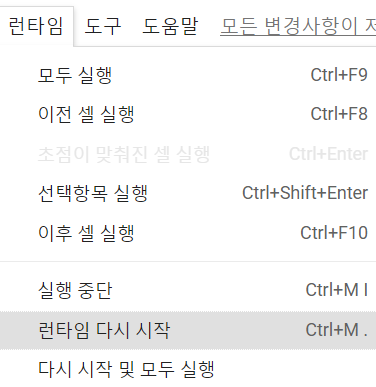

###2.7.3 그래프 그리기

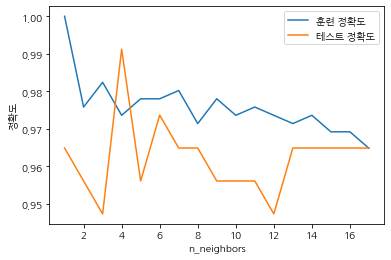

In [ ]:
X_train, X_test , y_train, y_test = train_test_split(df_data_scaled, df_labels, test_size = 0.2, random_state = 62)


training_accuracy = []
test_accuracy = []
# 1에서 18까지 n_neighbors를 적용
neighbors_settings = range(1, 18)

for n_neighbors in neighbors_settings:
    # 모델 생성
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    # fit 적용 시 y_train 정보는 1차원 배열로 전달되어야 한다.
    # 하지만 y_train은 2차원 배열로 되어 있어 reshape를 처리했다.
    clf.fit(X_train, y_train.values.reshape(-1))
    # 훈련 세트 정확도 저장
    training_accuracy.append(clf.score(X_train, y_train))
    # 일반화 정확도 저장
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="훈련 정확도")
plt.plot(neighbors_settings, test_accuracy, label="테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend()

> 실행 결과 앞 부분이 높은 수치를 포현하고 있지만 훈련데이터에 너무 치중되어 나타난다. 테스트 데이터는 13부터 안정적으로 나타나며 훈련데이터와 테스트데이터가 골고루 정확도가 높은 14가 최적의 파라미터가 될 수 있다.

#3. 모델 저장하기

##3.1 메모리에 저장하기

In [ ]:
import pickle

saved_model = pickle.dumps(clf)

In [ ]:
clf.predict(X_test)

array([0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1])

In [ ]:
# Load the pickled model
clf_from_pickle = pickle.loads(saved_model)

# Use the loaded pickled model to make predictions
clf_from_pickle.predict(X_test)


array([0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1])

##3.2 파일에 저장하기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
# from sklearn.externals import joblib
import joblib

save_model_filepath = '/content/drive/MyDrive/3. 머신러닝/3. K-최근접 이웃/model/breast_cancer_v1.pkl'
joblib.dump(clf, save_model_filepath)

ImportError: ignored